# Compar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats
import pandas as pd
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator 
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
mpl.rcParams.update({"lines.linewidth": 1.2})


In [2]:
data=pd.read_csv('/Users/shakes/Dropbox/Apps/Overleaf/Thandolwethu Dlamini Thesis/templates/JPnotebooks/RefSite0_Data.csv')

In [38]:
data.describe()

,observations,ConstantTerm,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.901994,1.089875,0.002751,0.001455,0.001255,0.000445,0.001275
std,0.147964,0.094468,0.003167,0.001217,0.000987,0.000552,0.001398
min,0.548148,0.872548,-0.001422,-0.000536,-0.000468,-0.000327,-0.001227
25%,0.814219,1.019467,0.000302,0.000521,0.000475,0.000115,0.000274
50%,0.898857,1.083240,0.001518,0.001094,0.001031,0.000247,0.000657
75%,0.970871,1.159353,0.004387,0.002208,0.001865,0.000619,0.001999
max,1.691778,1.365205,0.019574,0.006117,0.004905,0.004708,0.006037


In [4]:
data.columns

Index(['tstamp', 'observations', 'ConstantTerm', 'Spun_sigs', 'Npun_sigs',
       'Mdd_sigs', 'Aqp_sigs', 'Apr_sigs'],
      dtype='object')

In [5]:
regions=['Spun_sigs', 'Npun_sigs','Mdd_sigs', 'Aqp_sigs', 'Apr_sigs']
region_names=['South Puno', 'North Puno','Madre de Dios', 'Arequipa', 'Apurimac']
Peru_deps=dict(zip(regions,region_names))

In [6]:
Peru_deps

{'Spun_sigs': 'South Puno',
 'Npun_sigs': 'North Puno',
 'Mdd_sigs': 'Madre de Dios',
 'Aqp_sigs': 'Arequipa',
 'Apr_sigs': 'Apurimac'}

In [39]:
def nrmse_func(obs, pred, type = "sd"):
    from sklearn.metrics import mean_squared_error
    import math
    mse = mean_squared_error(obs, pred)
    rmse = math.sqrt(mse)
    if (type == "sd"):
        nrmse = rmse/np.std(obs)
    if (type == "mean"):
        nrmse = rmse/np.mean(obs)
    if (type == "maxmin"):
        nrmse = rmse/(max(obs) - min(obs))
    if (type == "iq"):
        nrmse = rmse/(np.percentile(obs, 0.75) - np.percentile(obs, 0.25))
    nrmse = round(nrmse, 3)
    return(nrmse)


In [74]:

init = np.array([7.75, 11.67,(1386.7788704774002/1000), (13633.991159353613/1000), 18.99])
i=0
for region in regions:
    base_sim=data['ConstantTerm']+data['Mdd_sigs']*init[i]
    base_nrmse = nrmse_func(obs, base_sim, type = "mean")
    i=i+1
    print(base_nrmse)

0.285
0.29
0.277
0.292
0.299


In [40]:
from sklearn.linear_model import LinearRegression
def detrend(series):
    # fit linear model
    X = [i for i in range(0, len(series))]
    X = np.reshape(X, (len(X), 1))
    y = series.values
    model = LinearRegression()
    model.fit(X, y)
    # calculate trend
    trend = model.predict(X)
    detrended = [y[i]-trend[i] for i in range(0, len(series))]
    return detrended

In [92]:
#numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None) 
obs=data['observations']
base_sim=data['ConstantTerm']+data['Mdd_sigs']*(13633.991159353613/1000)
base_nrmse = nrmse_func(obs, base_sim, type = "sd")
base_corr,_=stats.pearsonr(detrend(obs),detrend(base_sim))
obs_iqr=np.percentile(obs,75)-np.percentile(obs,25)
obs_nft=np.percentile(obs,97.5)-np.percentile(obs,2.5)
obs_mean=np.mean(obs)
emissions=np.arange(0,100,10)
iqrs={}
means={}
correlations={}
ninefiths={}
nrmses={}
fac2s={}
for region in regions:
    iqrs[region]=[]
    means[region]=[]
    correlations[region]=[]
    ninefiths[region]=[]
    nrmses[region]=[]
    fac2s[region]=[]
    for i in emissions:
        y=data['ConstantTerm']+data[region]*i
        iqr_y=np.percentile(y,75)-np.percentile(y,25)
        ninefiths[region].append(np.percentile(y,97.5)-np.percentile(y,2.5))
        mean_y=np.mean(y)
        detrend_obs=detrend(obs)
        detrend_y=detrend(y)
        r,_=stats.pearsonr(detrend_obs,detrend_y)
        nrmse=nrmse_func(obs,y,type='sd')
        iqrs[region].append(iqr_y)
        means[region].append(mean_y)
        correlations[region].append(r)
        nrmses[region].append(nrmse)


In [79]:
pd.DataFrame(nrmses)

,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs
0,1.679,1.679,1.679,1.679,1.679
1,1.871,1.768,1.755,1.709,1.767
2,2.084,1.862,1.833,1.739,1.860
3,2.312,1.960,1.915,1.769,1.957
4,2.551,2.061,1.999,1.801,2.057
5,2.799,2.165,2.085,1.833,2.160
6,3.053,2.271,2.173,1.866,2.265
7,3.311,2.380,2.263,1.900,2.373
8,3.574,2.490,2.354,1.934,2.483
9,3.839,2.602,2.447,1.969,2.594


In [44]:
pd.DataFrame(correlations)

,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs
0,0.271165,0.271165,0.271165,0.271165,0.271165
1,0.233601,0.266456,0.268319,0.264082,0.243729
2,0.198245,0.260246,0.264255,0.256584,0.216842
3,0.170069,0.253404,0.259503,0.248812,0.191875
4,0.148433,0.246469,0.254436,0.240890,0.169408
5,0.131751,0.239745,0.249300,0.232928,0.149532
6,0.118677,0.233389,0.244252,0.225013,0.132089
7,0.108234,0.227469,0.239387,0.217216,0.116820
8,0.099741,0.221999,0.234756,0.209593,0.103442
9,0.092717,0.216970,0.230382,0.202183,0.091689


# Create Plots for the 95th percentile range case

In [11]:

def plot_regression_nft(reg):
    fig = plt.figure(figsize=(4,3))
    fig.clf()
    
    x,y=(emissions,ninefiths[reg])

    plt.xlim(-10, 100)
    plt.ylim(0.1, 1.5)

    # ax.xaxis.set_major_locator(MaxNLocator(6))
    # ax.yaxis.set_major_locator(MaxNLocator(6))

    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    # ax.yaxis.set_minor_locator(MultipleLocator(1))
    name=Peru_deps[reg]+' '+'Hg$^0$ Signal 95$^{th}$ Percentile Range'
    file_name=reg+'.pdf'

    #regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    line = slope*x+intercept
    plt.scatter(x,y, color="k", s=3.5, marker="o", label=name)
    plt.plot(x, line, color='steelblue', linestyle='--', linewidth=2, label='y={:.6f}x+{:.2f}'.format(slope,intercept))
    plt.hlines(y=obs_nft, xmin=-25, xmax=x.max(), color='r', linewidth=1, label='95$^{th}$ Percentile Range')
    #end

    
    plt.scatter(60,0.01, color="w", s=8, marker="o", label='R$^2$={:.2f}'.format(r_value**2))
    plt.legend(fontsize=9, loc='upper left',frameon=False,ncol=1)
    plt.xlabel('Hg$^0$ Emissions (tonnes)')
    plt.ylabel("95$^{th}$ Percentile Range of Hg$^0$ Signal (ngm$^{-1}$)")#{Peru_deps[reg]}
    
    # plt.title(f'Regression of IQR of {Peru_deps[reg]}\n Hg$^0$ Signal at CHC on emissions', fontsize=10)
    savepath='/Users/shakes/Dropbox/Apps/Overleaf/Thandolwethu Dlamini Thesis/templates/figures/individual_site_modifications/nft_'+file_name
    fig.savefig(savepath,bbox_inches = 'tight') 
    estimated_emissions=(obs_nft-intercept)/slope

    plt.show()
    print(f"The estimated amount of emissions from {Peru_deps[reg]} is {estimated_emissions} tons of Hg$^0$ and  the standard error is {std_err} tonnes of Hg$^0$")

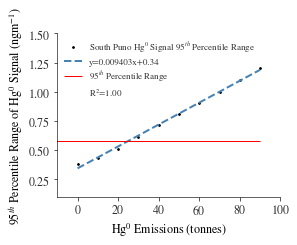

The estimated amount of emissions from South Puno is 24.871420354672587 tons of Hg$^0$ and  the standard error is 0.00019716344971815473 tonnes of Hg$^0$


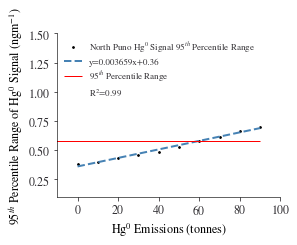

The estimated amount of emissions from North Puno is 59.46216130815637 tons of Hg$^0$ and  the standard error is 0.00014822041955655862 tonnes of Hg$^0$


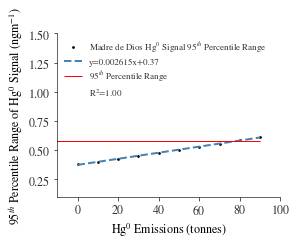

The estimated amount of emissions from Madre de Dios is 78.09678047007093 tons of Hg$^0$ and  the standard error is 5.7625996065433406e-05 tonnes of Hg$^0$


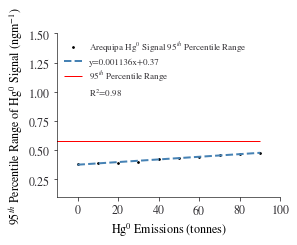

The estimated amount of emissions from Arequipa is 178.45509244306623 tons of Hg$^0$ and  the standard error is 6.021972528228658e-05 tonnes of Hg$^0$


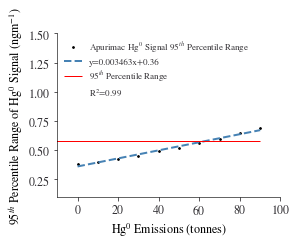

The estimated amount of emissions from Apurimac is 62.860262084923626 tons of Hg$^0$ and  the standard error is 0.00014351423516000347 tonnes of Hg$^0$


In [12]:
for region in regions:
    plot_regression_nft(region)

In [31]:

def plot_regression(reg):
    fig = plt.figure(figsize=(4,3),dpi=300)
    fig.clf()
    
    x,y=(emissions,iqrs[reg])

    plt.xlim(-10, 100)
    plt.ylim(0.1, 0.4)

    # ax.xaxis.set_major_locator(MaxNLocator(6))
    # ax.yaxis.set_major_locator(MaxNLocator(6))

    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    # ax.yaxis.set_minor_locator(MultipleLocator(1))
    name=Peru_deps[reg]+' '+'Hg$^0$ Signal IQR'
    file_name=reg+'.pdf'

    #regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    line = slope*x+intercept
    plt.scatter(x,y, color="k", s=3.5, marker="o")# label=name)
    plt.plot(x, line, color='steelblue', linestyle='--', linewidth=2, label='$y={:.6f}x+{:.2f}$'.format(slope,intercept))
    plt.hlines(y=obs_iqr, xmin=-25, xmax=x.max(), color='r', linewidth=1, label='Observed IQR')
    #end

    
    plt.scatter(60,0.01, color="w", s=8, marker="o", label='$R^2 = {:.2f}$'.format(r_value**2))
    plt.legend(fontsize=9, loc='upper left',frameon=False,ncol=3,bbox_to_anchor=(-0.2,1.2))
    plt.xlabel('Hg$^0$ Emissions (tons)')
    plt.ylabel("IQR of Hg$^0$ Signal (ngm$^{-1}$)")#{Peru_deps[reg]}
    
    # plt.title(f'Regression of IQR of {Peru_deps[reg]}\n Hg$^0$ Signal at CHC on emissions', fontsize=10)
    savepath='/Users/shakes/Dropbox/Apps/Overleaf/Thandolwethu Dlamini Thesis/templates/figures/individual_site_modifications/iqr'+file_name
    fig.savefig(savepath,bbox_inches = 'tight') 
    estimated_emissions=(obs_iqr-intercept)/slope

    plt.show()
    print(f"The estimated amount of emissions from {Peru_deps[reg]} is {estimated_emissions} tons of Hg$^0$ and  the standard error is {std_err} tonnes of Hg$^0$")

# Creat Plots for the IQR case

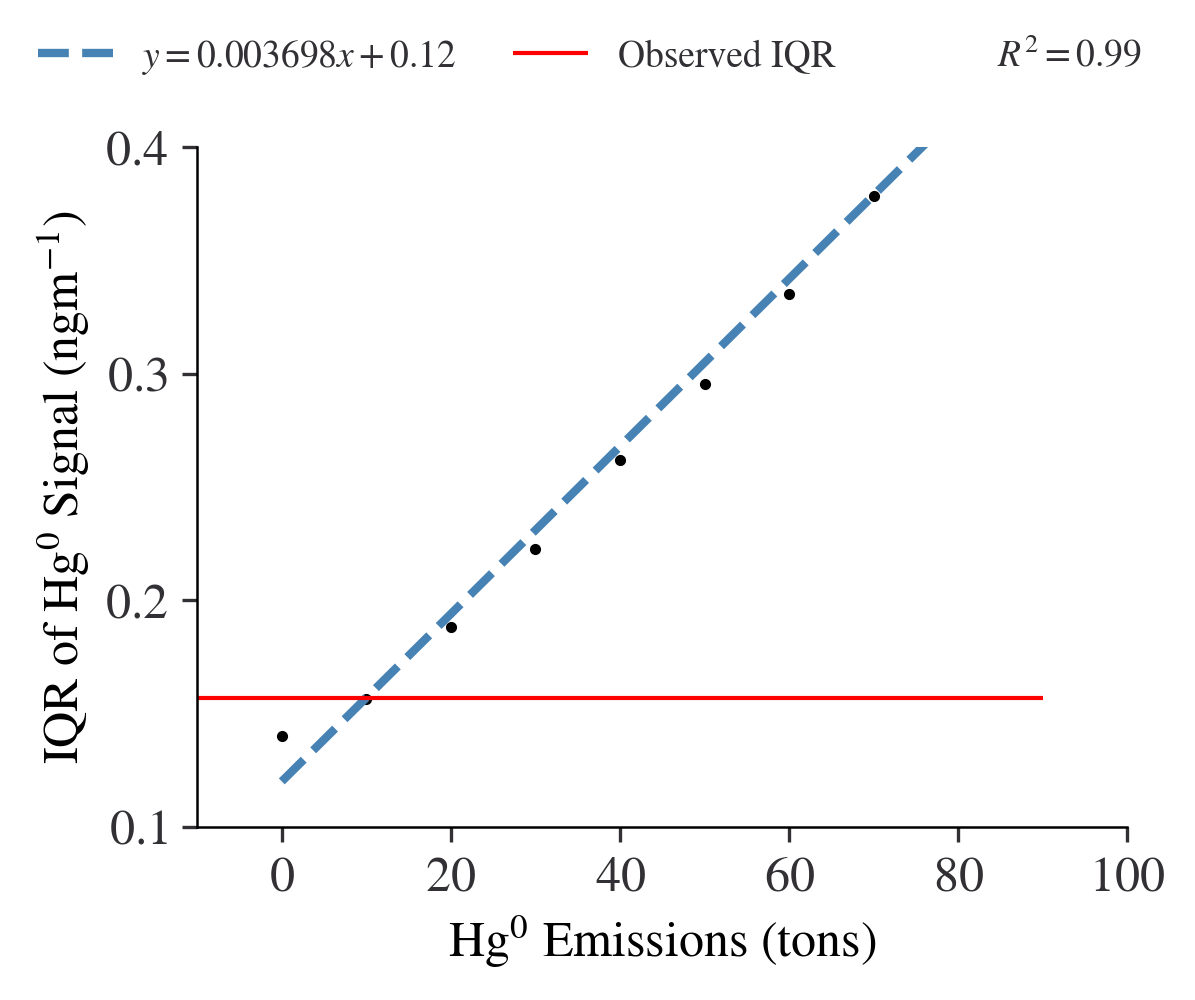

The estimated amount of emissions from South Puno is 9.931820043520323 tons of Hg$^0$ and  the standard error is 0.00011406201754025663 tonnes of Hg$^0$


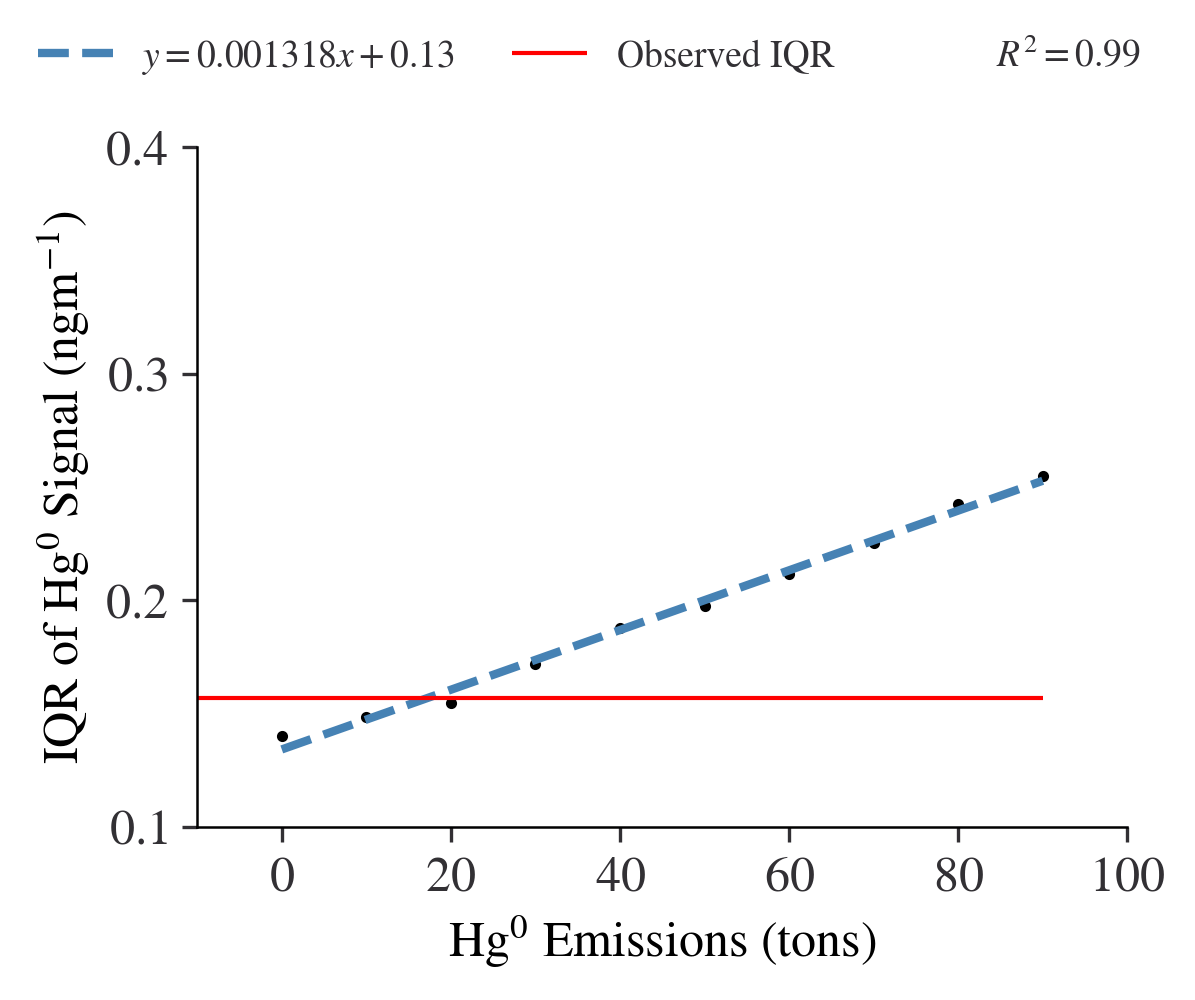

The estimated amount of emissions from North Puno is 17.159182664949782 tons of Hg$^0$ and  the standard error is 3.847693281817765e-05 tonnes of Hg$^0$


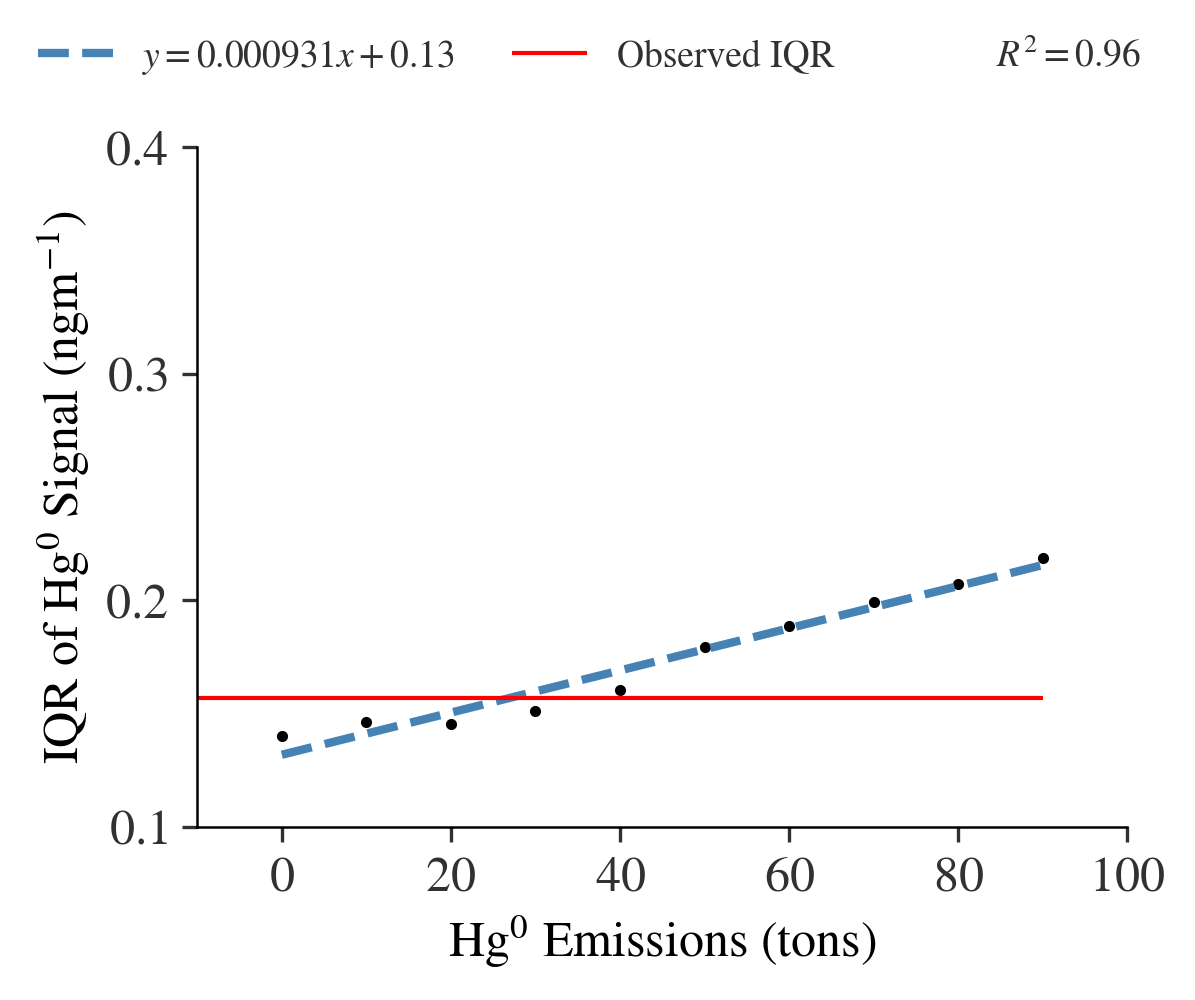

The estimated amount of emissions from Madre de Dios is 26.821979949749544 tons of Hg$^0$ and  the standard error is 6.584899052922315e-05 tonnes of Hg$^0$


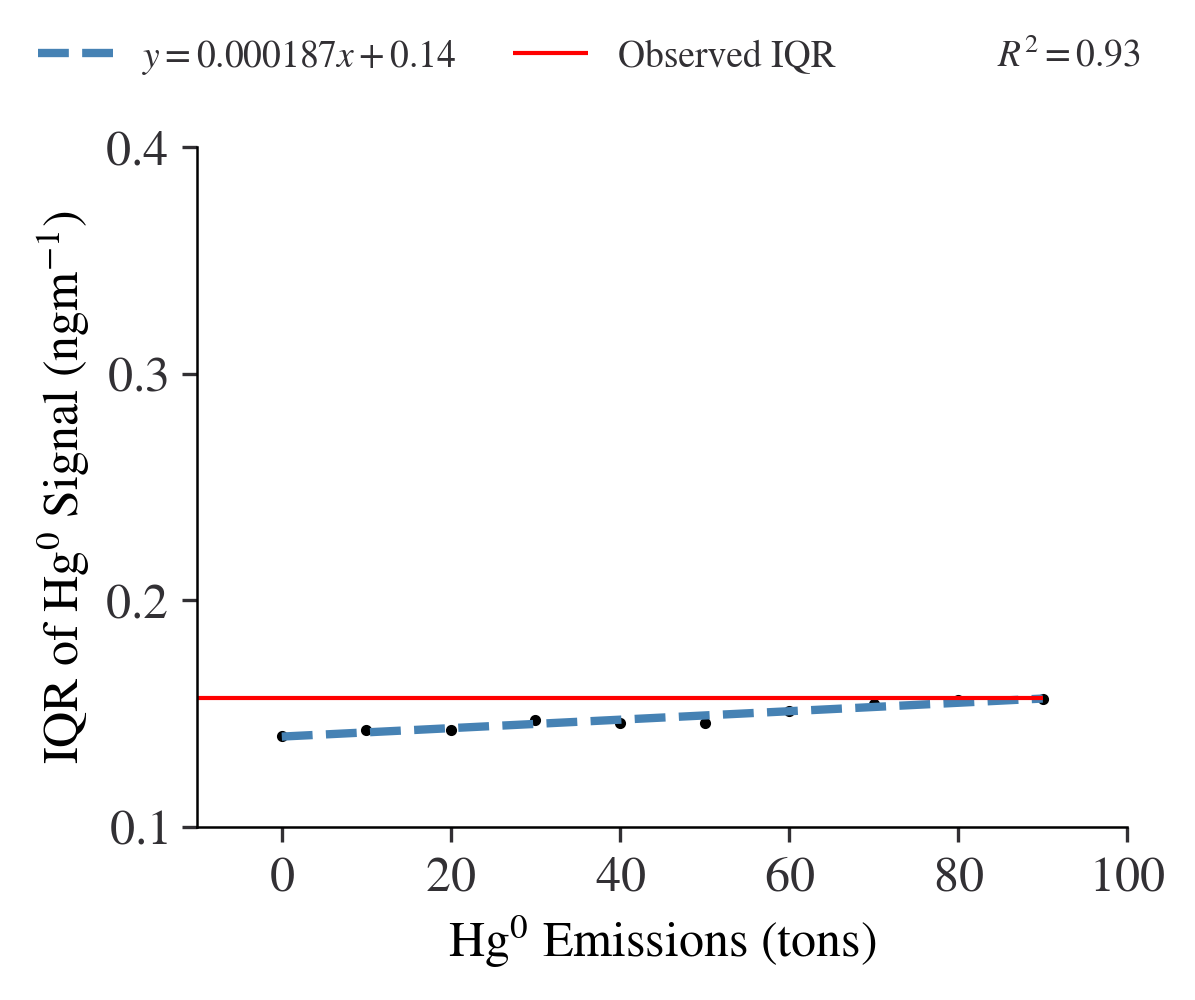

The estimated amount of emissions from Arequipa is 90.7799700418898 tons of Hg$^0$ and  the standard error is 1.794082920714627e-05 tonnes of Hg$^0$


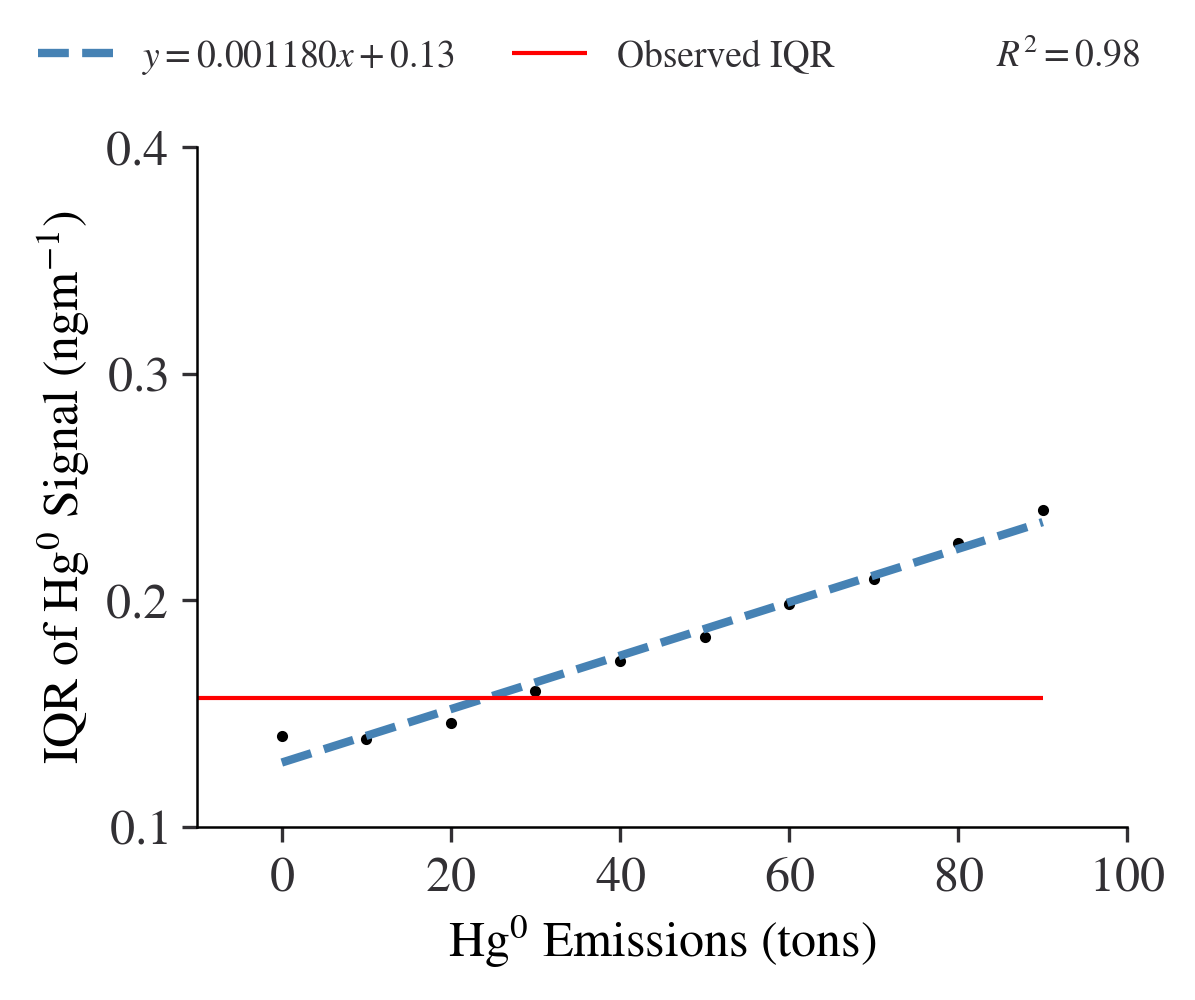

The estimated amount of emissions from Apurimac is 24.080186931436966 tons of Hg$^0$ and  the standard error is 6.094628630231327e-05 tonnes of Hg$^0$


In [32]:
for region in regions:
    plot_regression(region)

# Set up function to generate plots plots for the mean case

In [34]:
def plot_regression_mean(reg):
    fig = plt.figure(figsize=(4,3),dpi=300)
    fig.clf()
    
    x,y=(emissions,means[reg])

    plt.xlim(-10, 100)
    # plt.ylim(0.1, 0.35)

    # plt.xlim(-25, 60)
    plt.ylim(0.85, 1.5)

    # ax.xaxis.set_major_locator(MaxNLocator(6))
    # ax.yaxis.set_major_locator(MaxNLocator(6))

    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    # ax.yaxis.set_minor_locator(MultipleLocator(1))
    name=Peru_deps[reg]+' '+'Hg$^0$ Signal Mean'
    file_name=reg+'.pdf'

    #regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    line = slope*x+intercept
    plt.scatter(x,y, color="k", s=8, marker="o")# label=name)
    plt.plot(x, line, color='steelblue', linestyle='--', linewidth=2, label='$y={:.6f}x+{:.2f}$'.format(slope,intercept))
    plt.hlines(y=obs_mean, xmin=-25, xmax=x.max(), color='r', linewidth=1, label='Observed Mean')
    #end
    plt.scatter(60,0.85, color="w", s=8, marker="o", label='$R^2 = {:.2f}$'.format(r_value**2))
    plt.legend(fontsize=9, loc='upper left',frameon=False,ncol=3,bbox_to_anchor=(-0.2,1.20))
    plt.xlabel('Hg$^0$ Emissions (tons)')
    plt.ylabel("Mean of Hg$^0$ Signal (ngm$^{-1}$)")#of {Peru_deps[reg]}
    # plt.title(f'Regression of Mean of {Peru_deps[reg]} \n Hg$^0$ Signal at CHC on emissions', fontsize=10)
    savepath='/Users/shakes/Dropbox/Apps/Overleaf/Thandolwethu Dlamini Thesis/templates/figures/individual_site_modifications/mean_'+file_name
    fig.savefig(savepath,bbox_inches = 'tight') 
    estimated_emissions=(obs_mean-intercept)/slope

    plt.show()
    print(f"The estimated amount of emissions from {Peru_deps[reg]} is {estimated_emissions} tons of Hg$^0$ and  the standard error is {std_err} tons of Hg$^0$")
    

# Create plots for the mean case

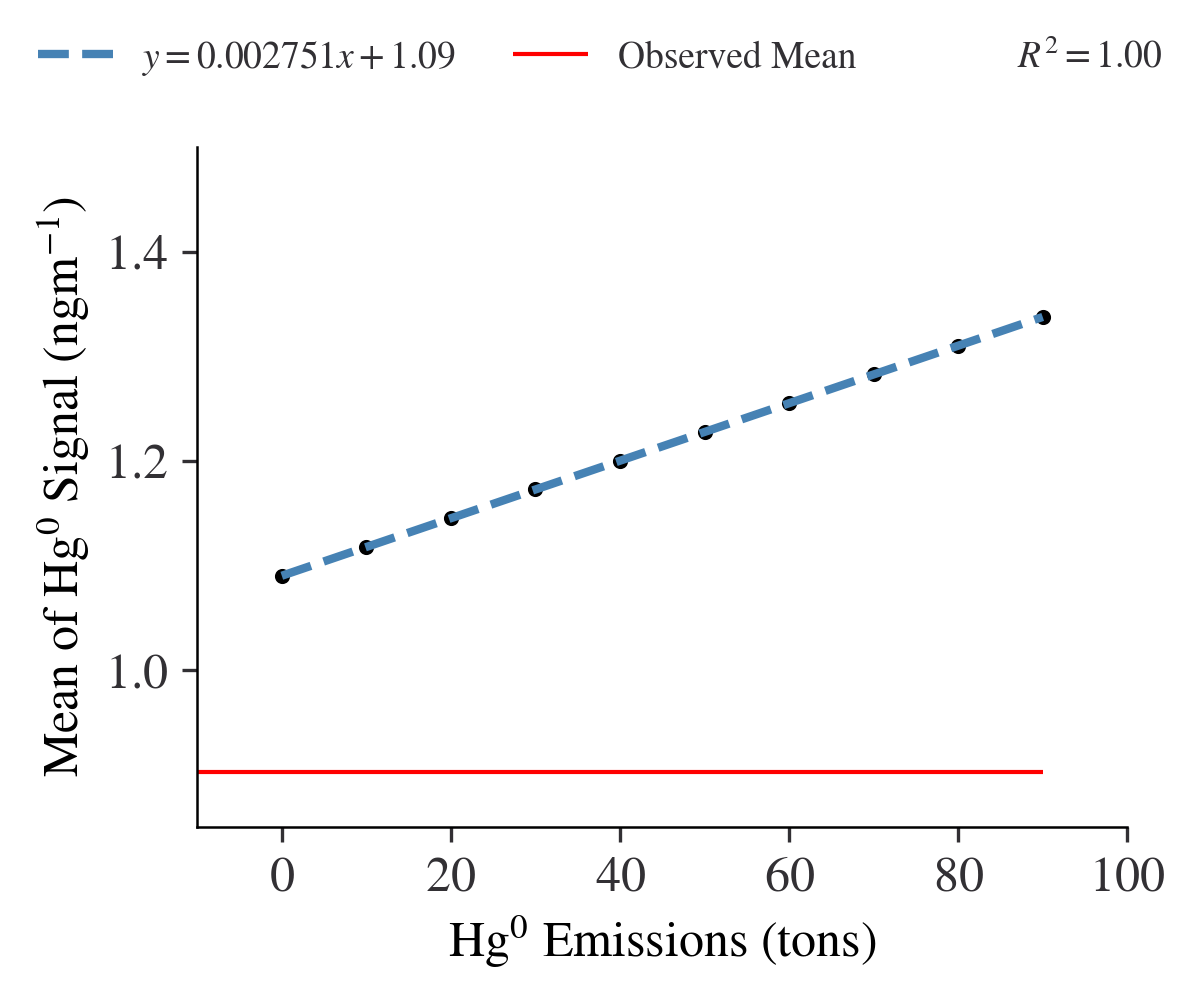

The estimated amount of emissions from South Puno is -68.29853708161488 tons of Hg$^0$ and  the standard error is 2.0495601657952666e-11 tons of Hg$^0$


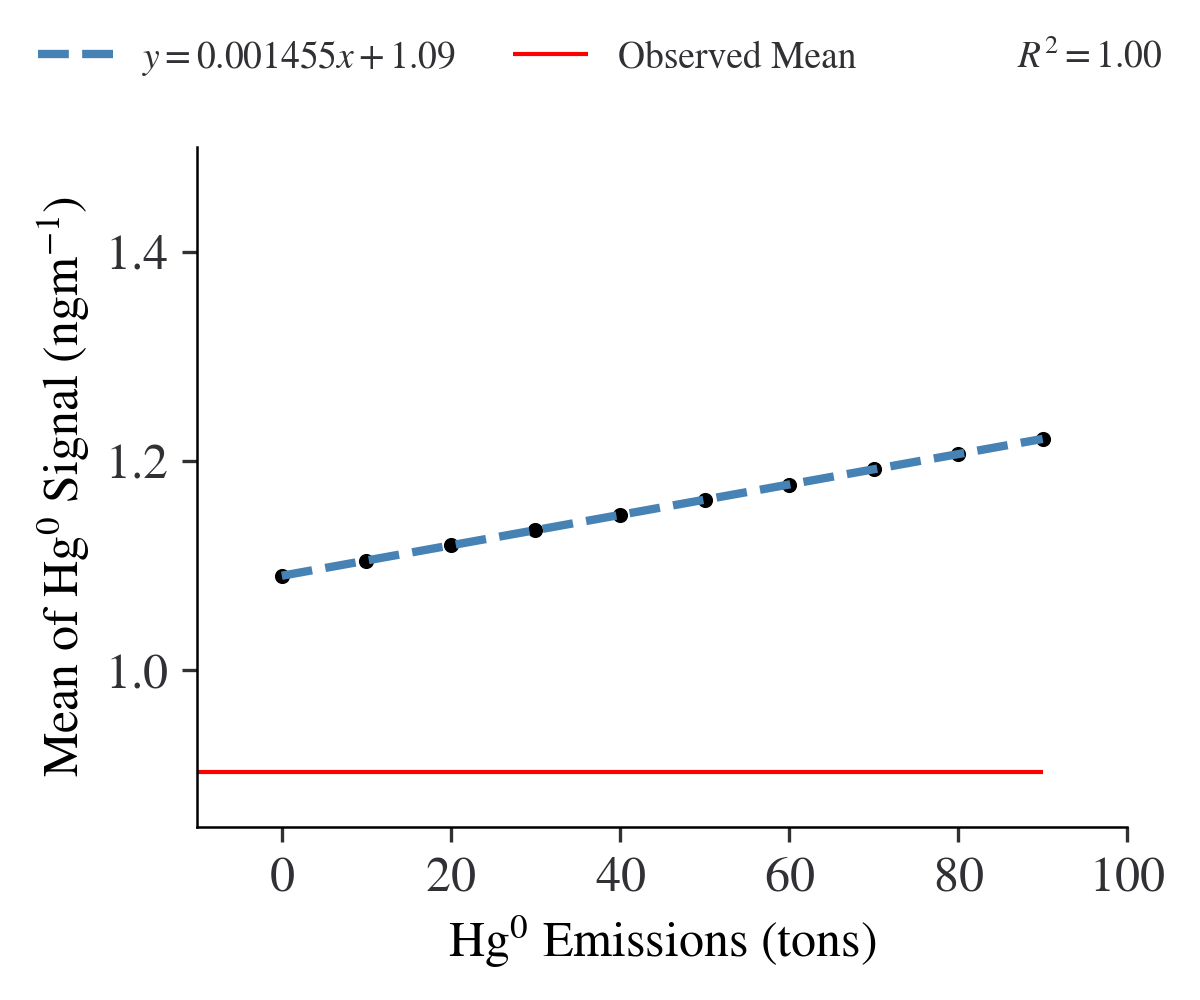

The estimated amount of emissions from North Puno is -129.13171261791933 tons of Hg$^0$ and  the standard error is 0.0 tons of Hg$^0$


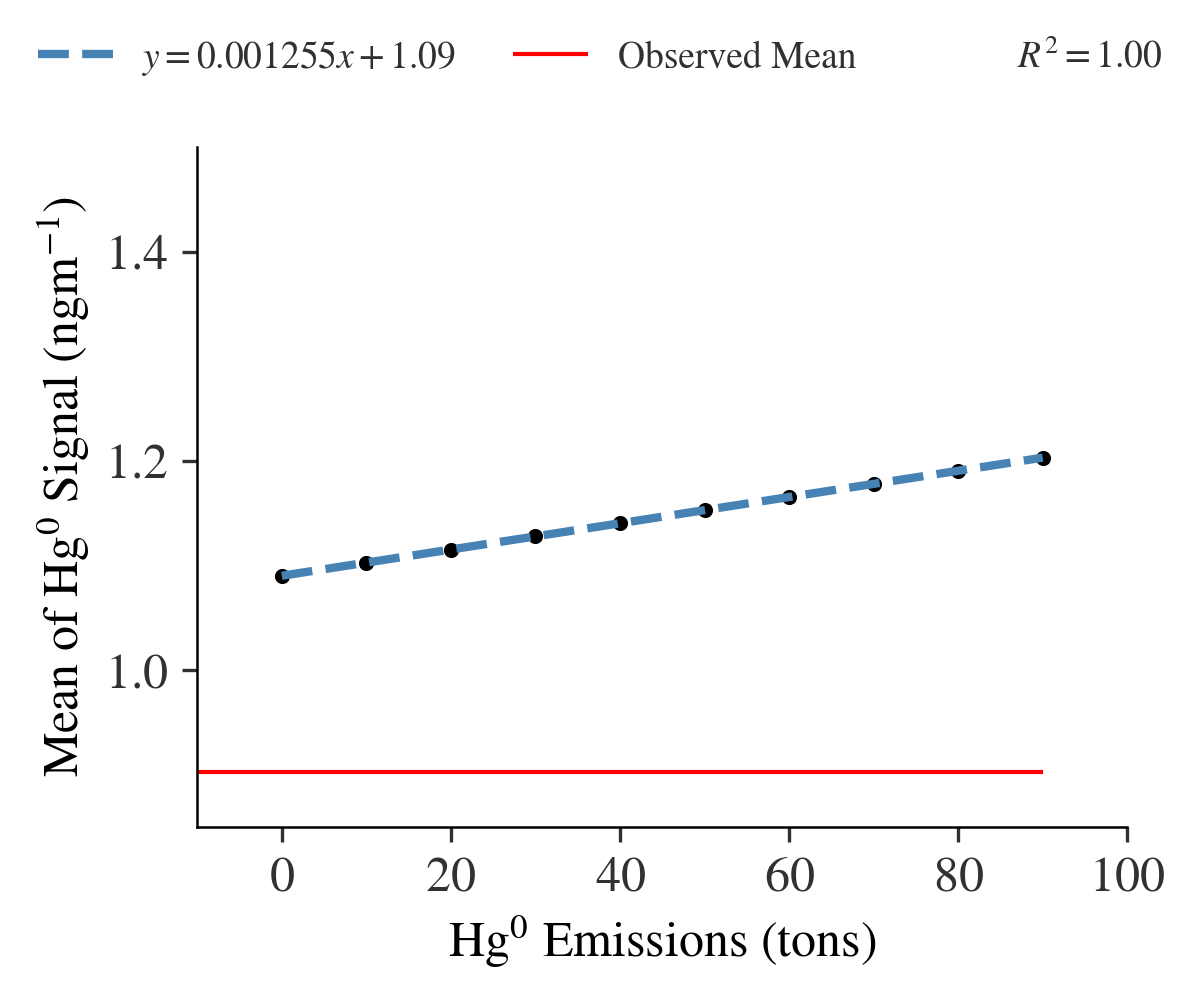

The estimated amount of emissions from Madre de Dios is -149.6529110394563 tons of Hg$^0$ and  the standard error is 0.0 tons of Hg$^0$


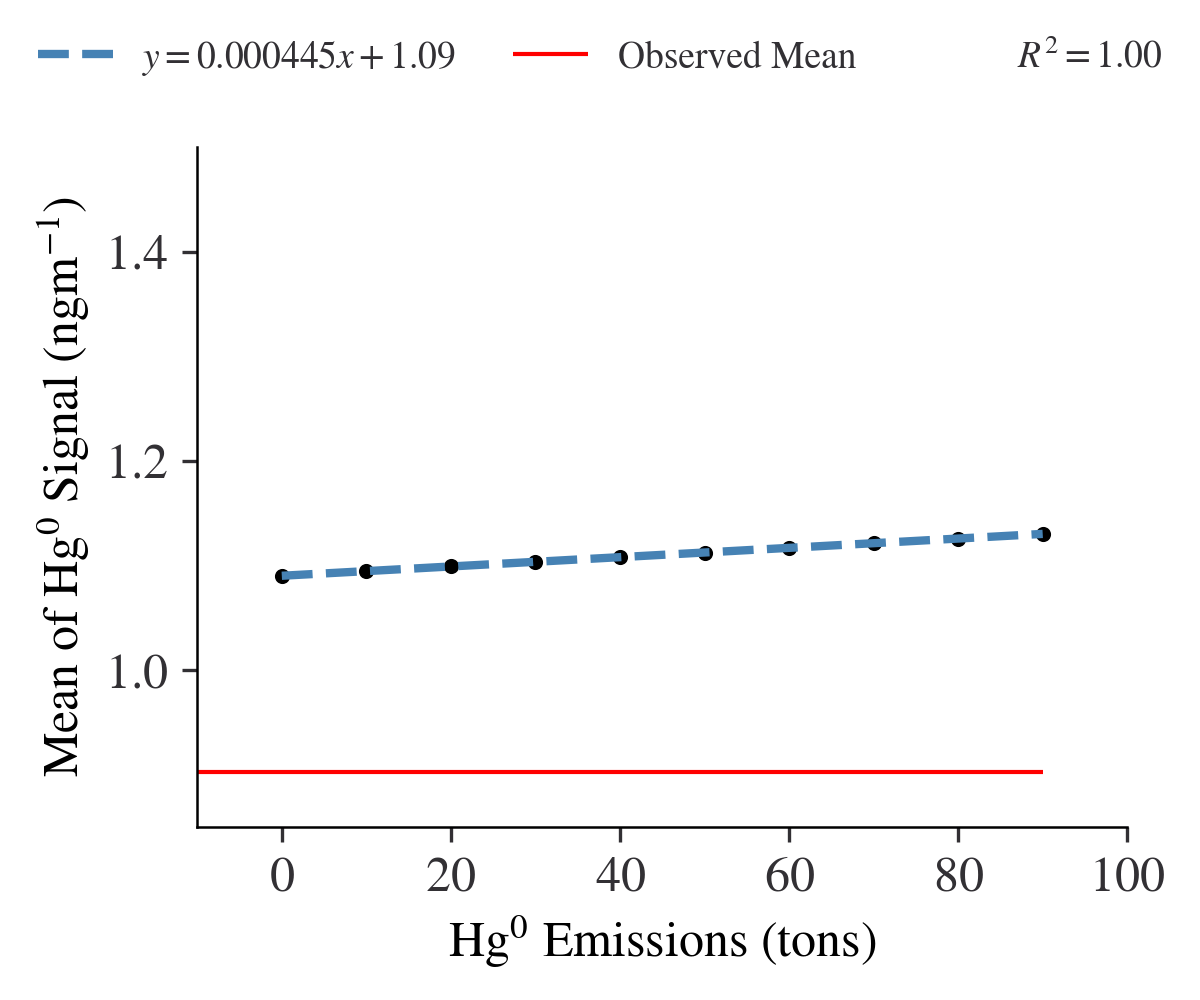

The estimated amount of emissions from Arequipa is -422.1612961198158 tons of Hg$^0$ and  the standard error is 0.0 tons of Hg$^0$


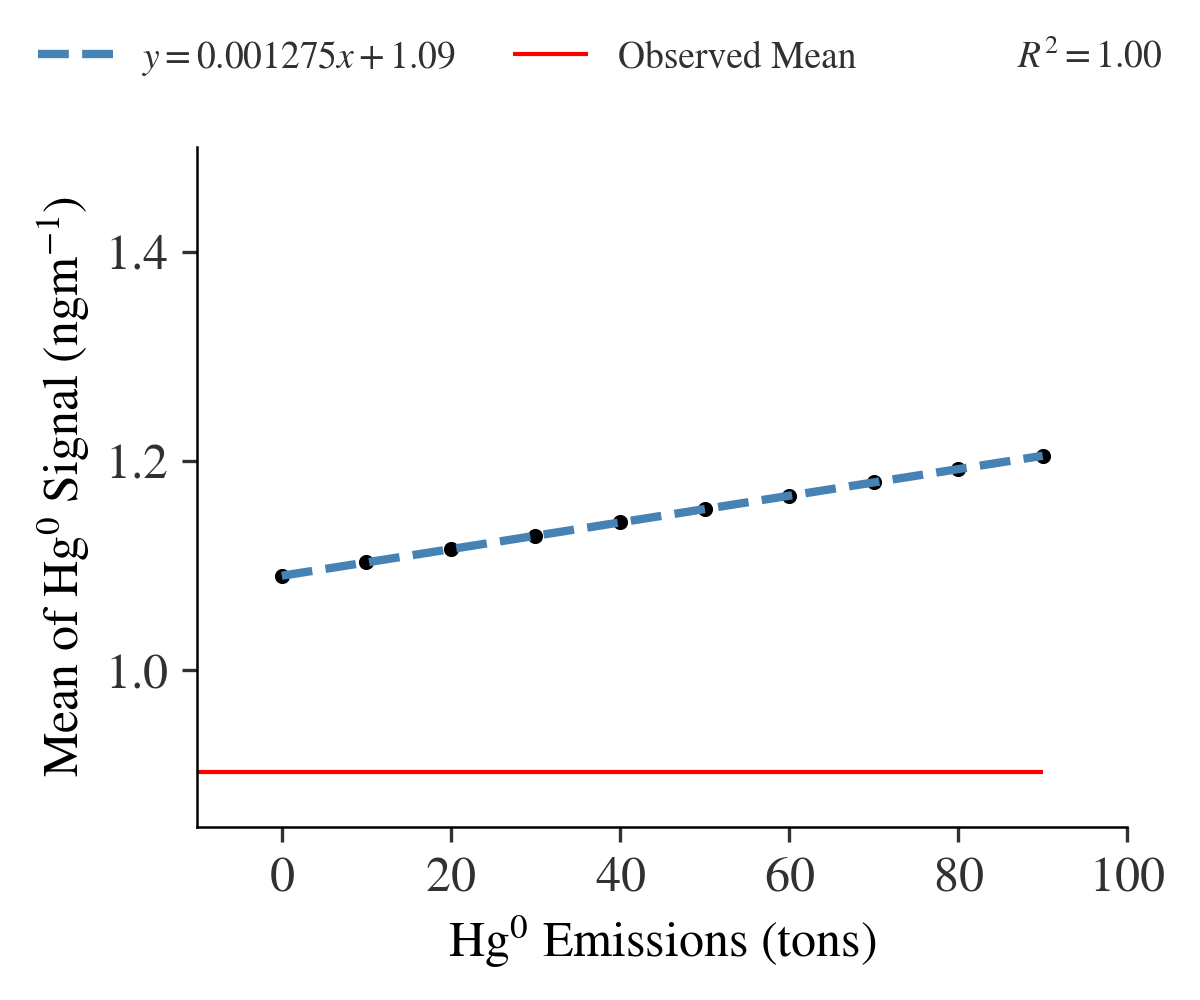

The estimated amount of emissions from Apurimac is -147.31107815432205 tons of Hg$^0$ and  the standard error is 0.0 tons of Hg$^0$


In [35]:
for region in regions:
    plot_regression_mean(region)

# Set up function to generate plots for correlation 

In [98]:
def plot_regression_corr(reg):
    fig = plt.figure(figsize=(4,3),dpi=300)
    fig.clf()
    
    x,y=(emissions,correlations[reg])
    plt.xlim(-10, 100)
    plt.ylim(0.05, 0.4)

    # ax.xaxis.set_major_locator(MaxNLocator(6))
    # ax.yaxis.set_major_locator(MaxNLocator(6))

    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    # ax.yaxis.set_minor_locator(MultipleLocator(1))
    name=f"Correlation between TGM and\n {Peru_deps[reg]} Hg$^0$ Signal at CHC"
    file_name=reg+'.pdf'

    #regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    line = slope*x+intercept
    plt.scatter(x,y, color="k", s=3.5, marker="o", )#label=name
    plt.plot(x, line, color='steelblue', linestyle='--', linewidth=2, label='$y={:.6f}x+{:.2f}$'.format(slope,intercept))
    plt.hlines(y=base_corr, xmin=-25, xmax=x.max(), color='r', linewidth=1, label='Corrrelation between TGM and \n Base (ASGM= ON) at CHC')
    #end

    
    plt.legend(fontsize=9, loc='best',frameon=False,ncol=3,bbox_to_anchor=(1.2,1.2))
    plt.xlabel('Emissions (tons Hg$^0$)')
    plt.ylabel(f"Correlation")
    # plt.title(f'Regression of Correlation of {Peru_deps[reg]} \n Hg$^0$ Signal at CHC on emissions', fontsize=10)
    savepath='/Users/shakes/Dropbox/Apps/Overleaf/Thandolwethu Dlamini Thesis/templates/figures/individual_site_modifications/corr_'+file_name
    fig.savefig(savepath,bbox_inches = 'tight') 
    estimated_emissions=(1-intercept)/slope

    plt.show()
    print(f"The estimated amount of emissions from {Peru_deps[reg]} is {estimated_emissions} tons of Hg$^0$ and  the standard error is {std_err} tons of Hg$^0$")

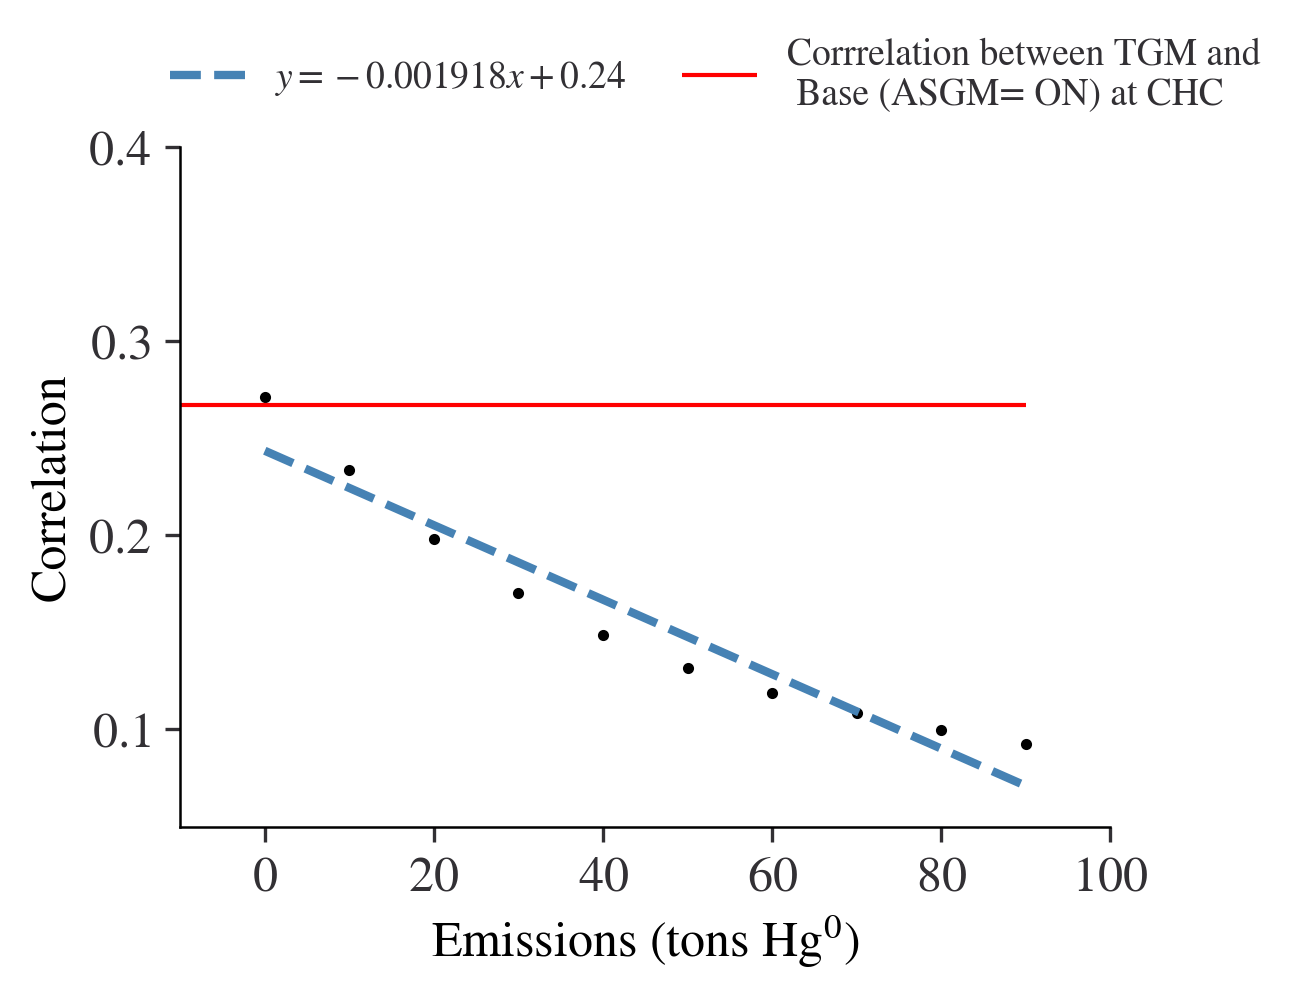

The estimated amount of emissions from South Puno is -394.48506865609306 tons of Hg$^0$ and  the standard error is 0.00019092598302178406 tons of Hg$^0$


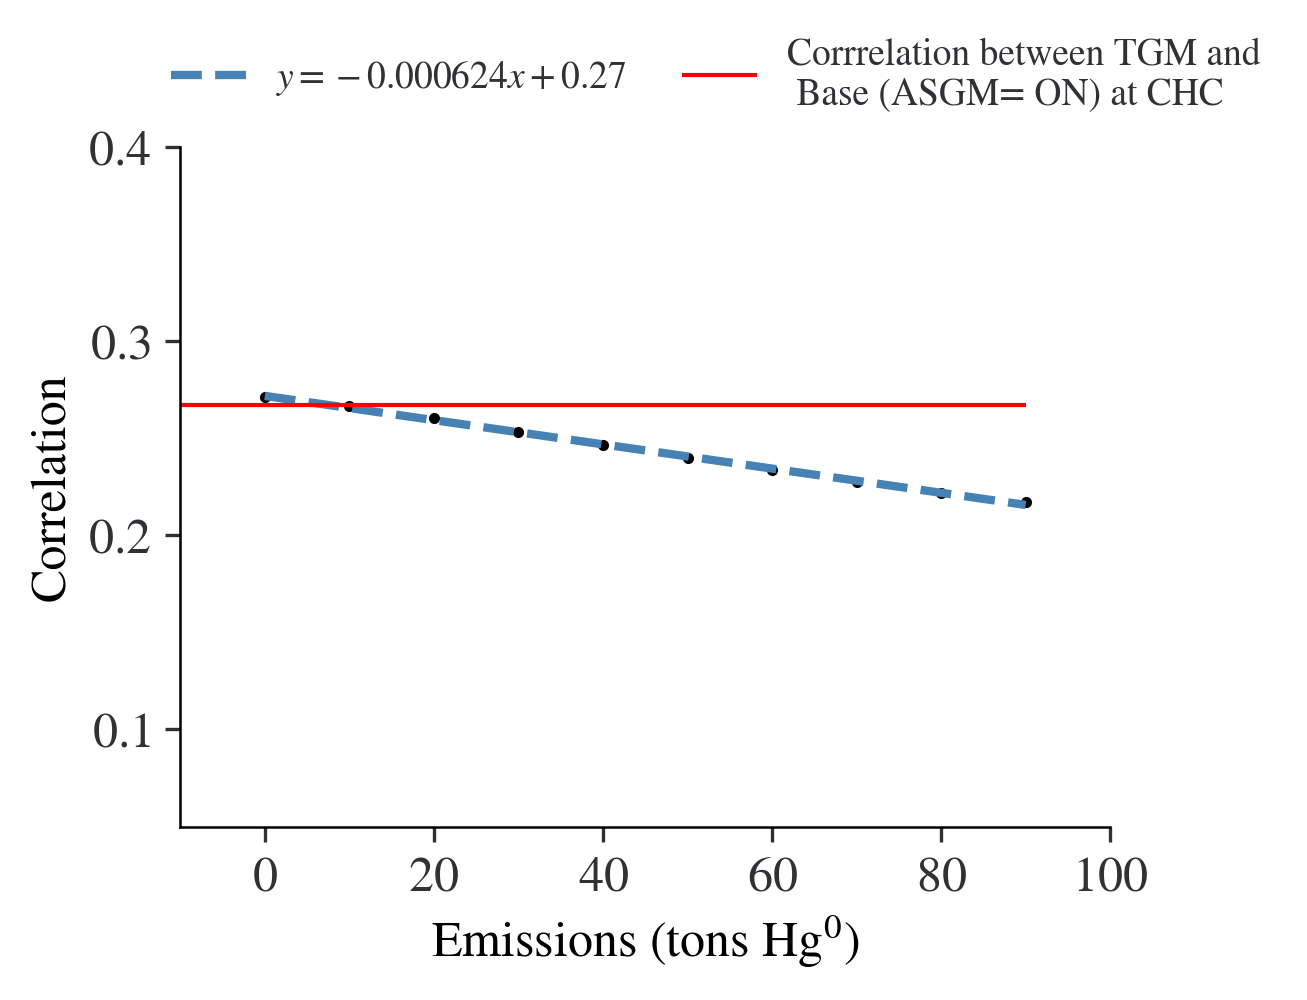

The estimated amount of emissions from North Puno is -1166.9549407209508 tons of Hg$^0$ and  the standard error is 9.679649737337514e-06 tons of Hg$^0$


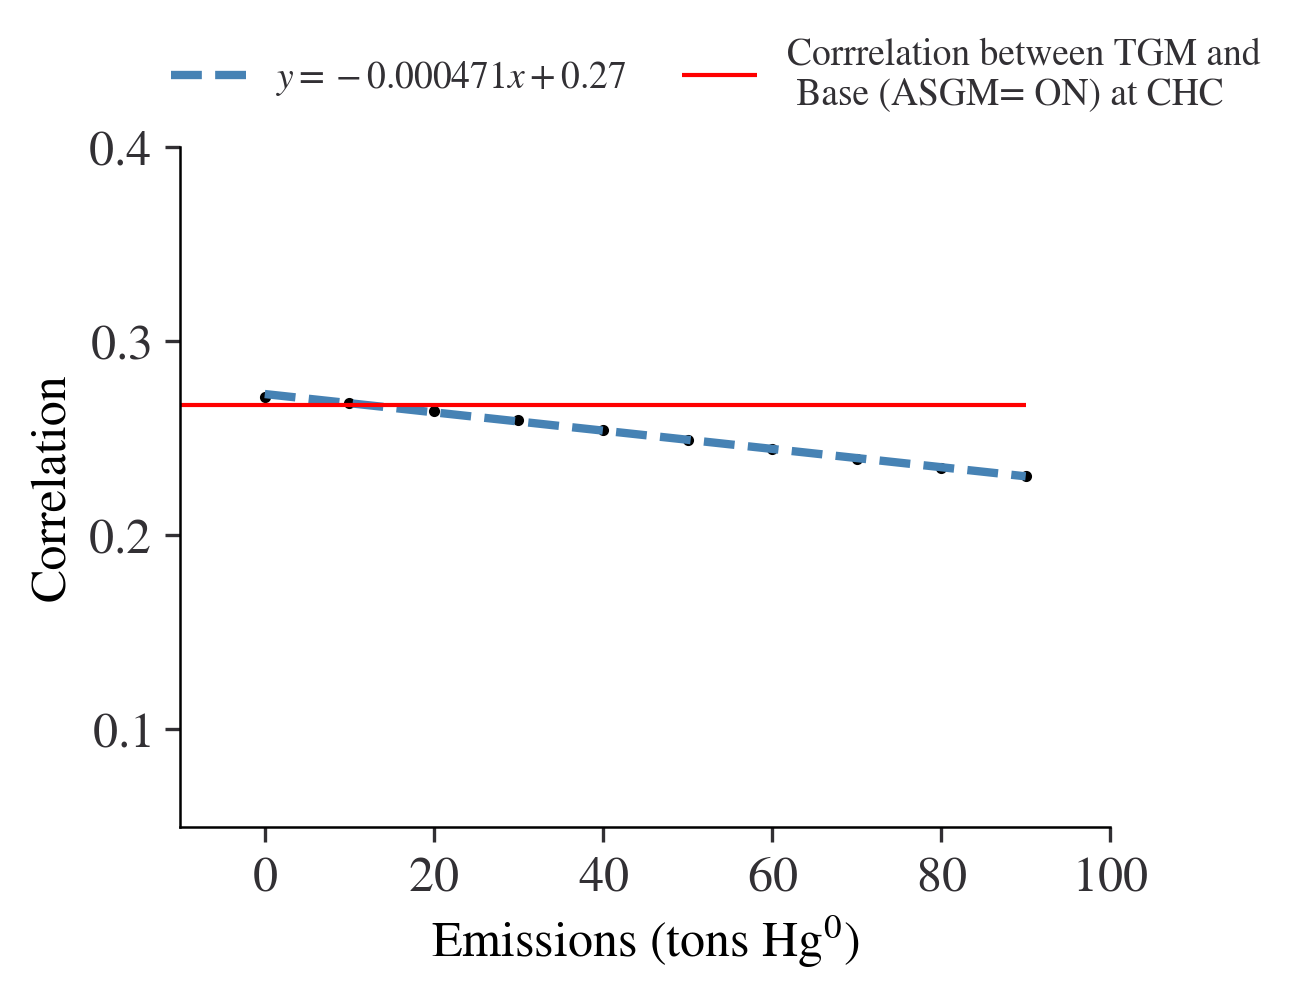

The estimated amount of emissions from Madre de Dios is -1543.8580358406316 tons of Hg$^0$ and  the standard error is 8.543208070102519e-06 tons of Hg$^0$


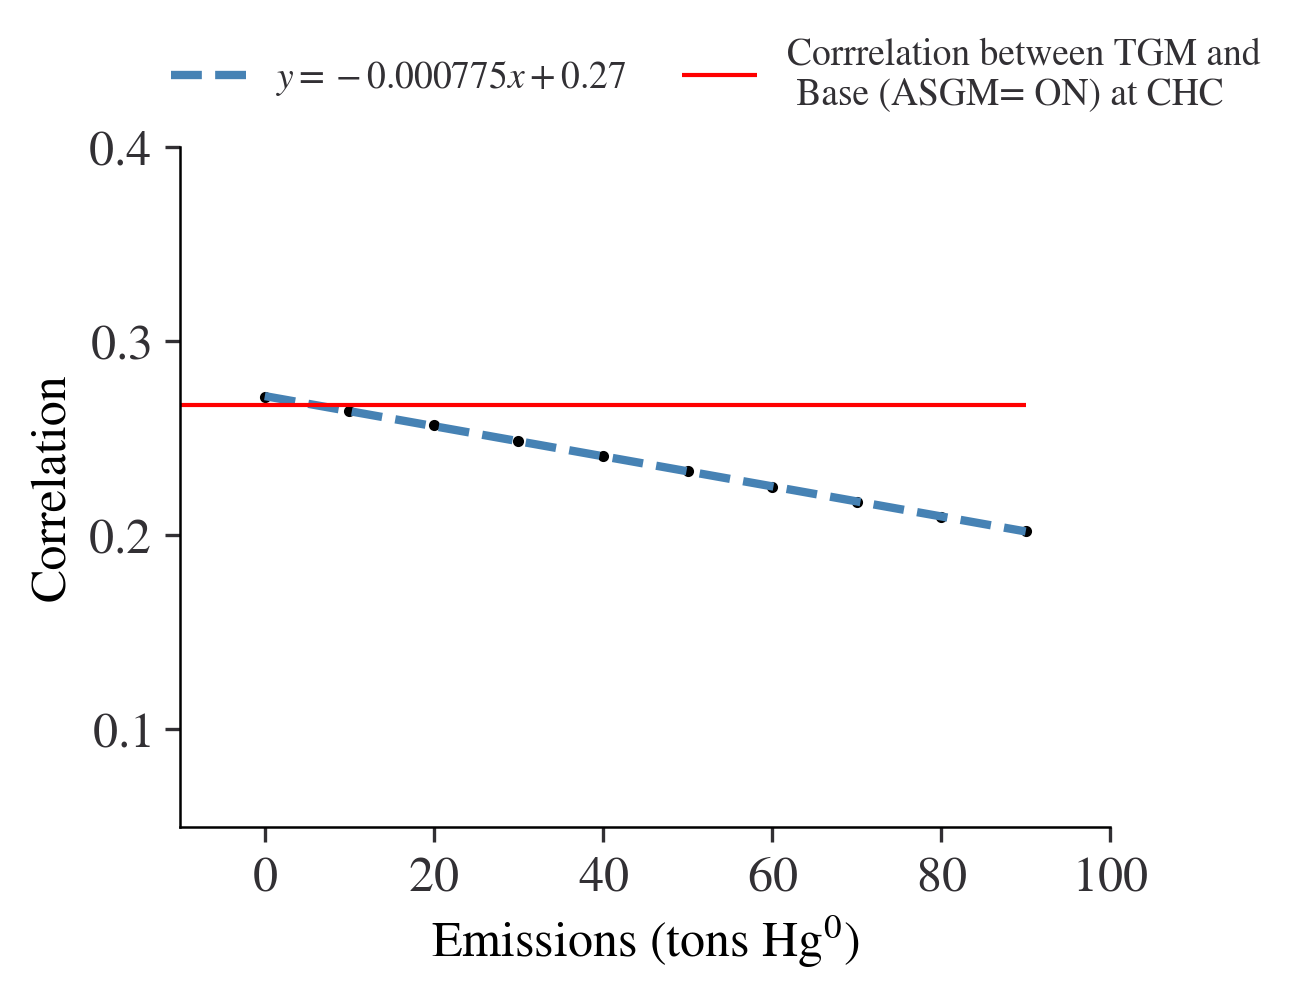

The estimated amount of emissions from Arequipa is -939.9331604812429 tons of Hg$^0$ and  the standard error is 3.4122661272701095e-06 tons of Hg$^0$


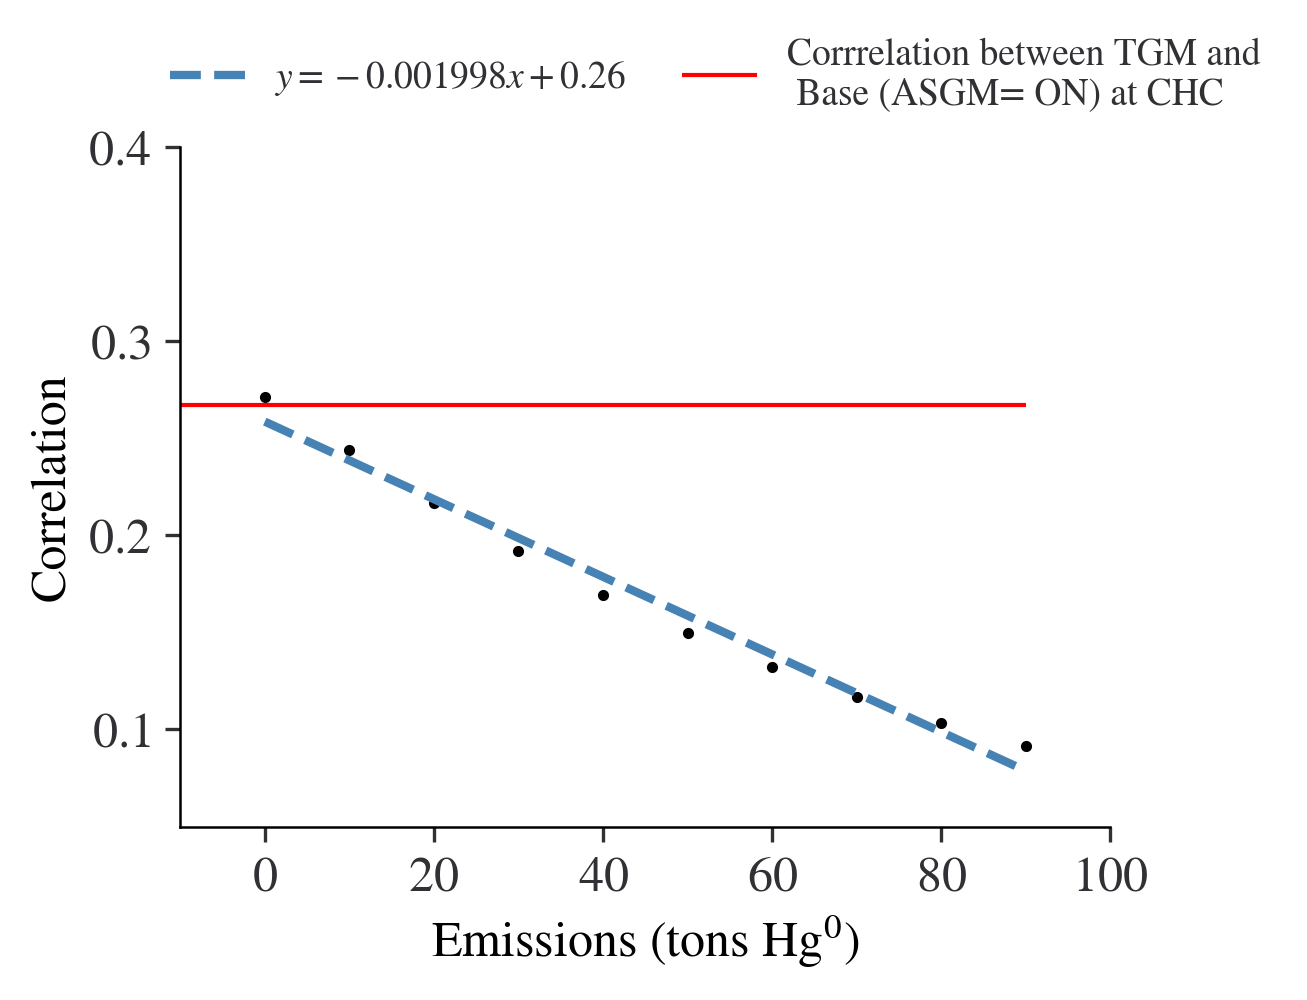

The estimated amount of emissions from Apurimac is -371.09405519270854 tons of Hg$^0$ and  the standard error is 9.843416682963875e-05 tons of Hg$^0$


In [99]:
for region in regions:
    plot_regression_corr(region)

# Set up function to generate NMSRE plots

In [83]:
def plot_regression_nrmse(reg):
    fig = plt.figure(figsize=(4,3),dpi=300)
    fig.clf()
    
    x,y=(emissions,nrmses[reg])

    plt.xlim(-10, 100)
    # plt.ylim(0, 0.3)

    name=f"NRMSE between TGM and\n {Peru_deps[reg]} Hg$^0$ Signal at CHC"
    file_name=reg+'.pdf'

    #regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    line = slope*x+intercept
    plt.scatter(x,y, color="k", s=3.5, marker="o", )#label=name
    plt.plot(x, line, color='steelblue', linestyle='--', linewidth=2, label='$y={:.6f}x+{:.2f}$'.format(slope,intercept))
    plt.hlines(y=base_nrmse, xmin=-25, xmax=x.max(), color='r', linewidth=1, label='NRMSE between TGM and \n Base (ASGM= ON) at CHC')
    #end
    plt.legend(fontsize=9, loc='best',frameon=False,ncol=3,bbox_to_anchor=(1,1.2))
    plt.xlabel('Emissions (tons Hg$^0$)')
    plt.ylabel(f"NRMSE")
    # plt.title(f'Regression of Correlation of {Peru_deps[reg]} \n Hg$^0$ Signal at CHC on emissions', fontsize=10)
    savepath='/Users/shakes/Dropbox/Apps/Overleaf/Thandolwethu Dlamini Thesis/templates/figures/individual_site_modifications/nrmse_'+file_name
    fig.savefig(savepath,bbox_inches = 'tight') 
    estimated_emissions=(1-intercept)/slope

    plt.show()
    print(f"The estimated amount of emissions from {Peru_deps[reg]} is {estimated_emissions} tons of Hg$^0$ and  the standard error is {std_err} tons of Hg$^0$")

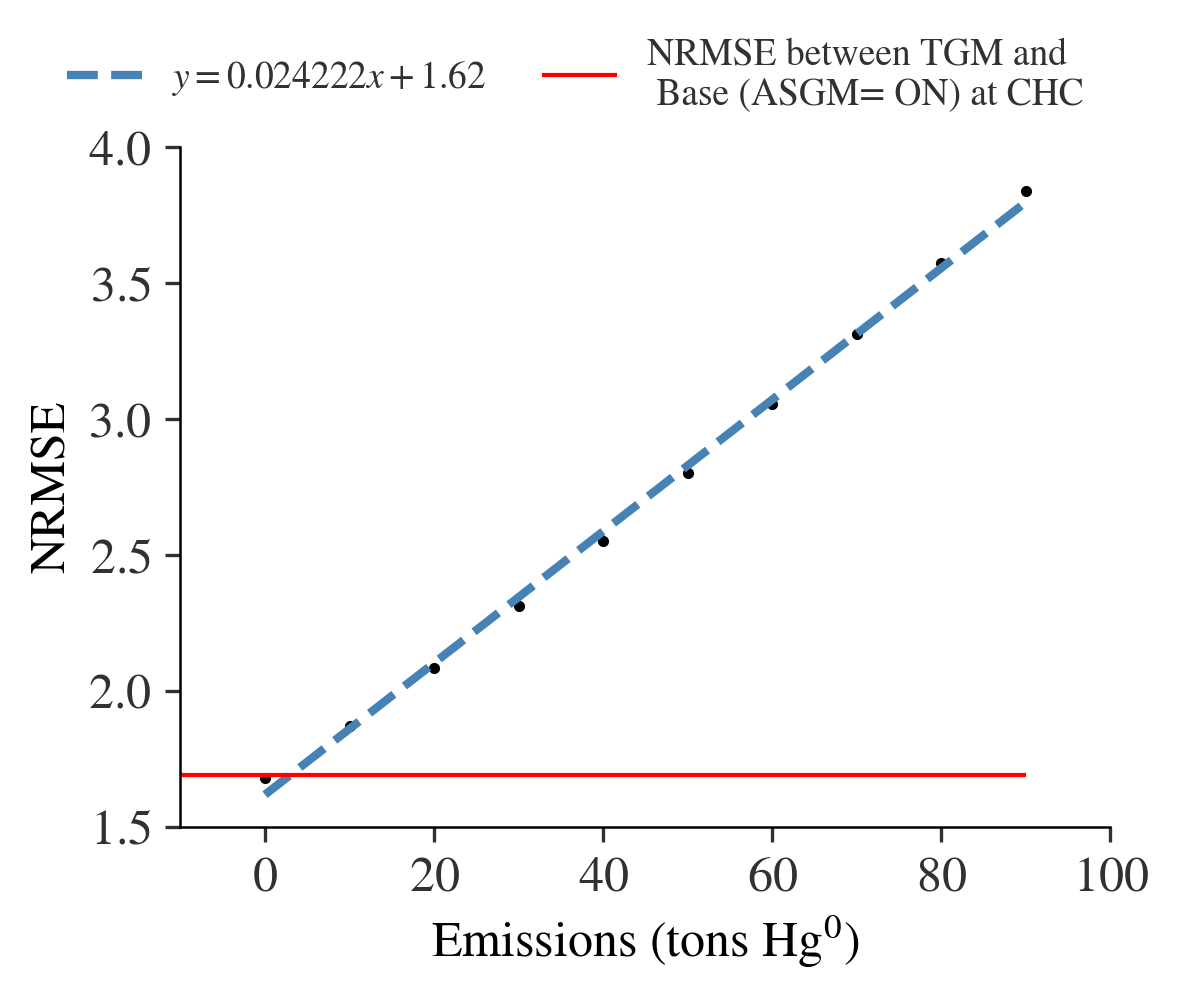

The estimated amount of emissions from South Puno is -25.484274526484313 tons of Hg$^0$ and  the standard error is 0.0003851397132397536 tons of Hg$^0$


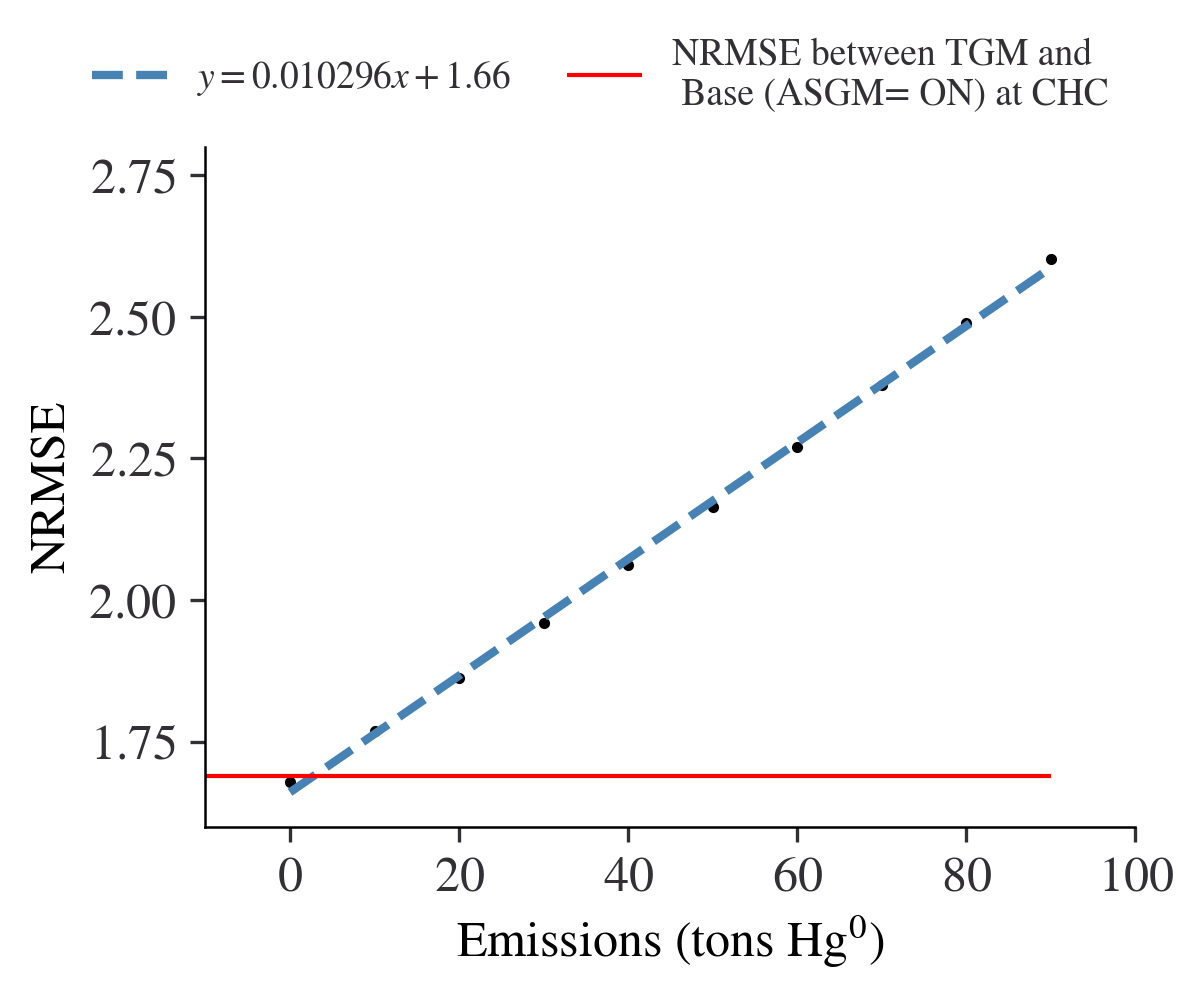

The estimated amount of emissions from North Puno is -64.15175417942078 tons of Hg$^0$ and  the standard error is 0.00012394717320181534 tons of Hg$^0$


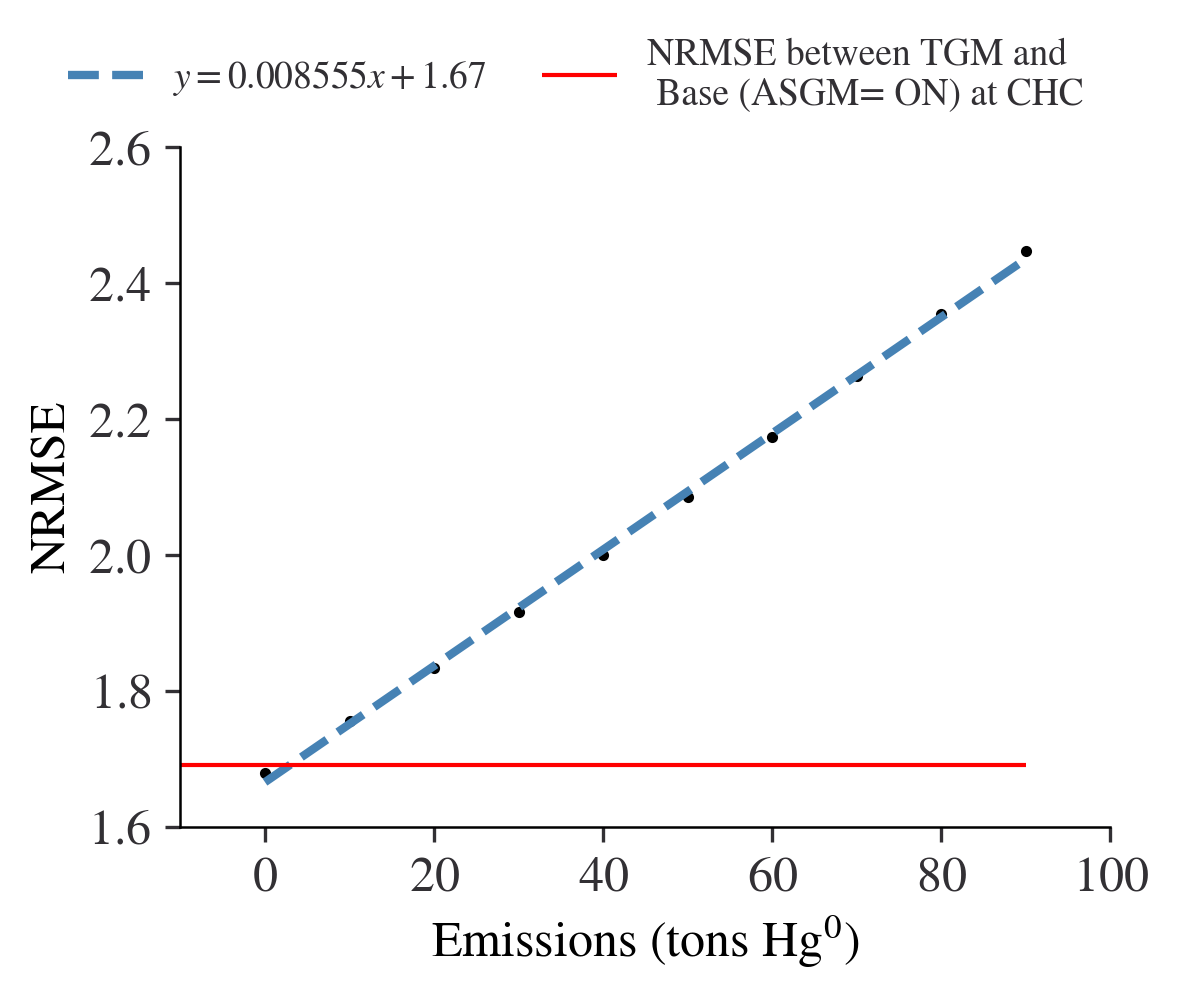

The estimated amount of emissions from Madre de Dios is -77.77683315621677 tons of Hg$^0$ and  the standard error is 9.46328267612568e-05 tons of Hg$^0$


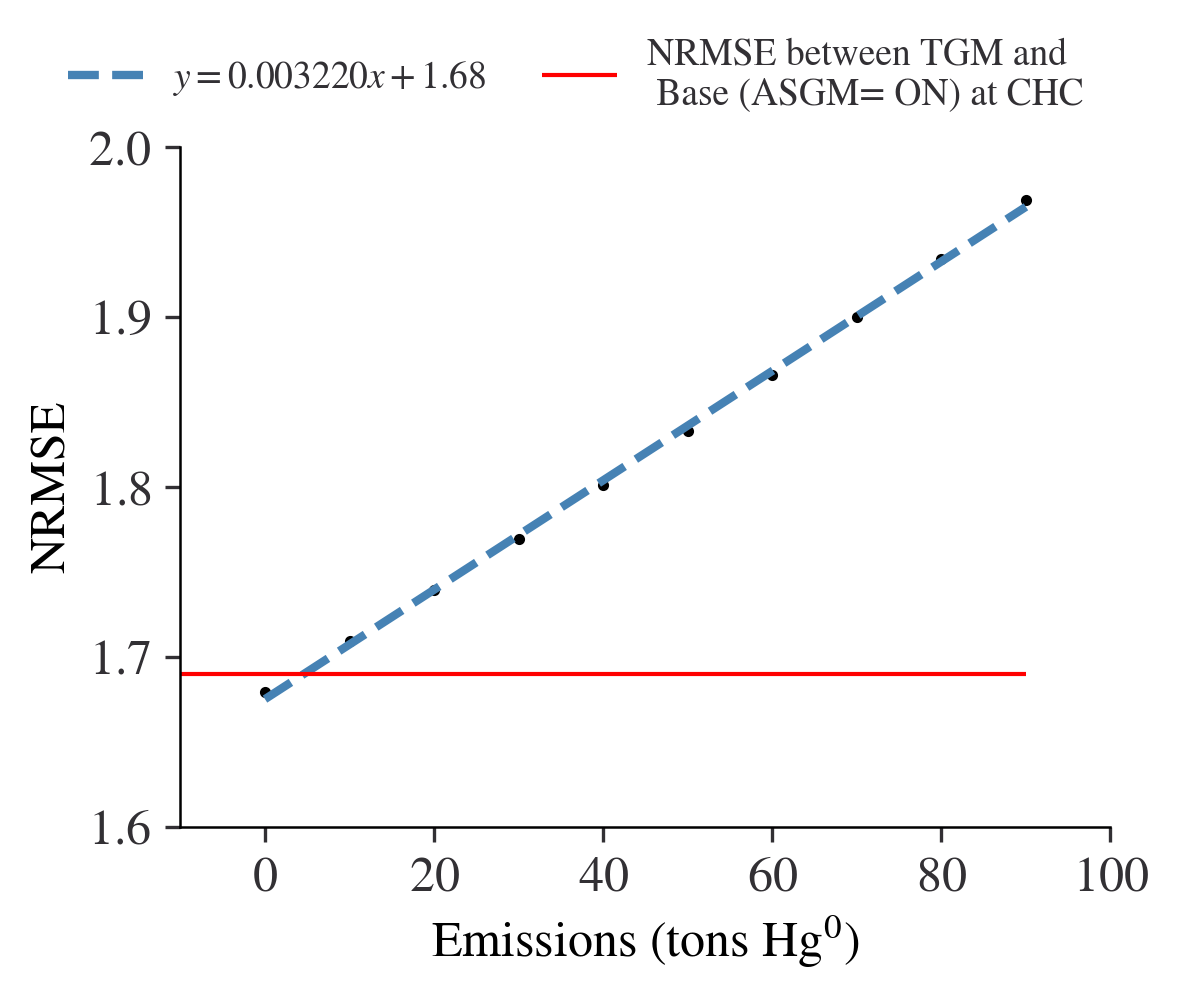

The estimated amount of emissions from Arequipa is -209.62732919254665 tons of Hg$^0$ and  the standard error is 3.200378765462589e-05 tons of Hg$^0$


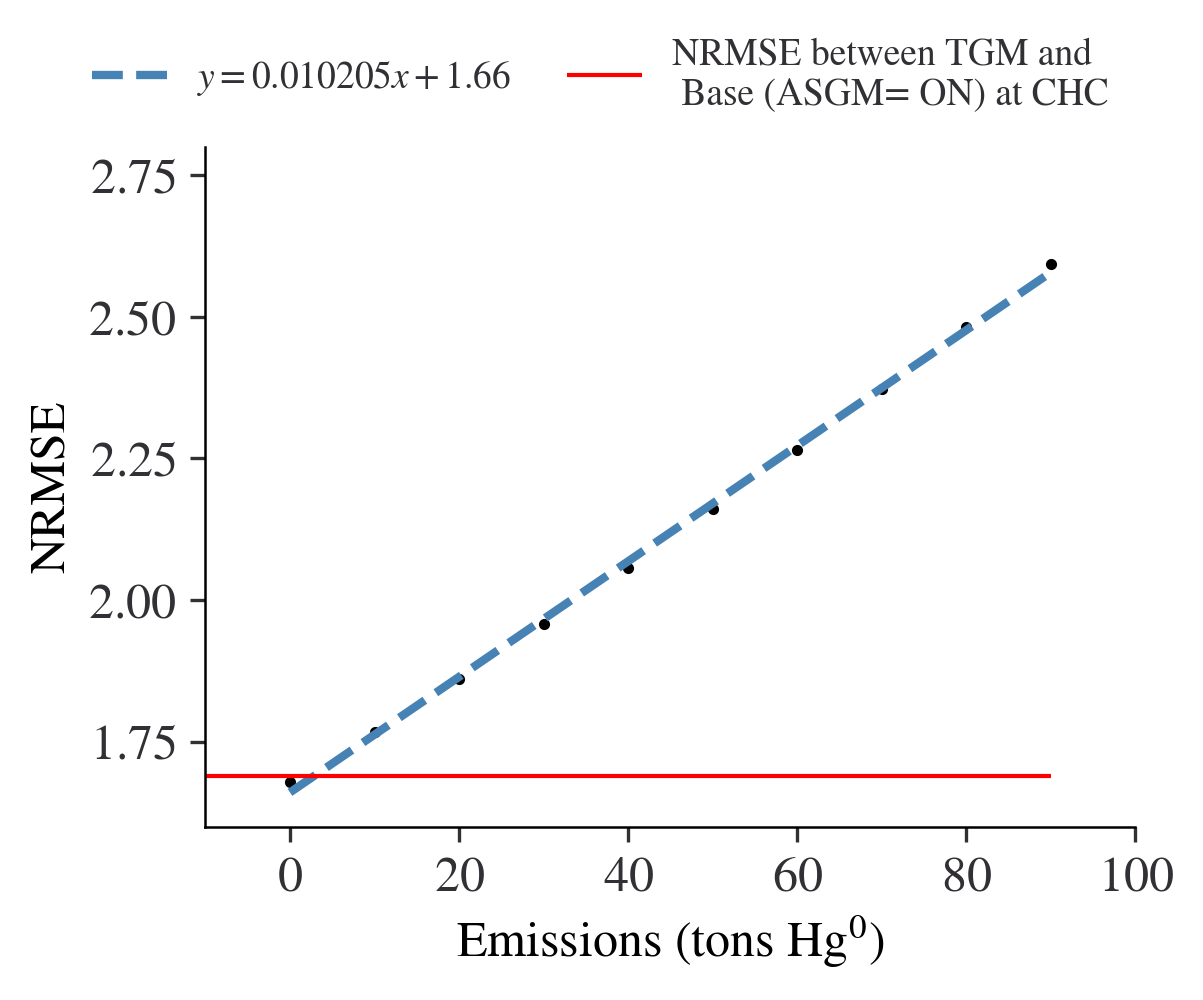

The estimated amount of emissions from Apurimac is -64.6962408694103 tons of Hg$^0$ and  the standard error is 0.00012650635062838562 tons of Hg$^0$


In [84]:
for region in regions:
    plot_regression_nrmse(region)